# Exploratory Data Analysis for Energy Efficiency

In [3]:
# Cell 1 (import libraries)
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import random
from scipy import stats
import warnings

In [4]:
#Cell 2
# Importing the dataset
random.seed(123)
df = pd.read_excel(r"D:\Data_Science_Course\Jupyter_Data_Set\Energy Efficiency.xlsx")
print("The main data set:")
df.head(5)

The main data set:


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load (Y1),Cooling Load (Y2)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [34]:
#Cell 2.5
categorical = []
numerical = []

for col in df.columns:
    if df[col].nunique() < 7: 
        categorical.append(col)
    else:
        numerical.append(col)

print("Categorical:", categorical)
print("Numerical:", numerical)


Categorical: ['Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
Numerical: ['Relative Compactness', 'Surface Area', 'Wall Area', 'Heating Load (Y1)', 'Cooling Load (Y2)']


# Check data quality

In [25]:
#Cell 3 

print("Shape of the DataFrame:", df.shape)
print("*******************")
# Check for null values
print("\nNull values in each column:")
print(df.isnull().sum())
print("*******************")


print("\nNumber of duplicate rows:", df.duplicated().sum())

if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
print("*******************")

print("\nBasic statistics:")
print(np.transpose(df.describe(include='all')))
print("*******************")

print("\nData types:")
print(df.dtypes)
print("*******************")

print("\nUnique values per column:")

print(df.nunique())



Shape of the DataFrame: (768, 10)
*******************

Null values in each column:
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load (Y1)            0
Cooling Load (Y2)            0
dtype: int64
*******************

Number of duplicate rows: 0
*******************

Basic statistics:
                           count        mean        std     min       25%  \
Relative Compactness       768.0    0.764167   0.105777    0.62    0.6825   
Surface Area               768.0  671.708333  88.086116  514.50  606.3750   
Wall Area                  768.0  318.500000  43.626481  245.00  294.0000   
Roof Area                  768.0  176.604167  45.165950  110.25  140.8750   
Overall Height             768.0    5.250000   1.751140    3.50    3.5000   
Orientation                768.0    3.500000

# Visual analysis

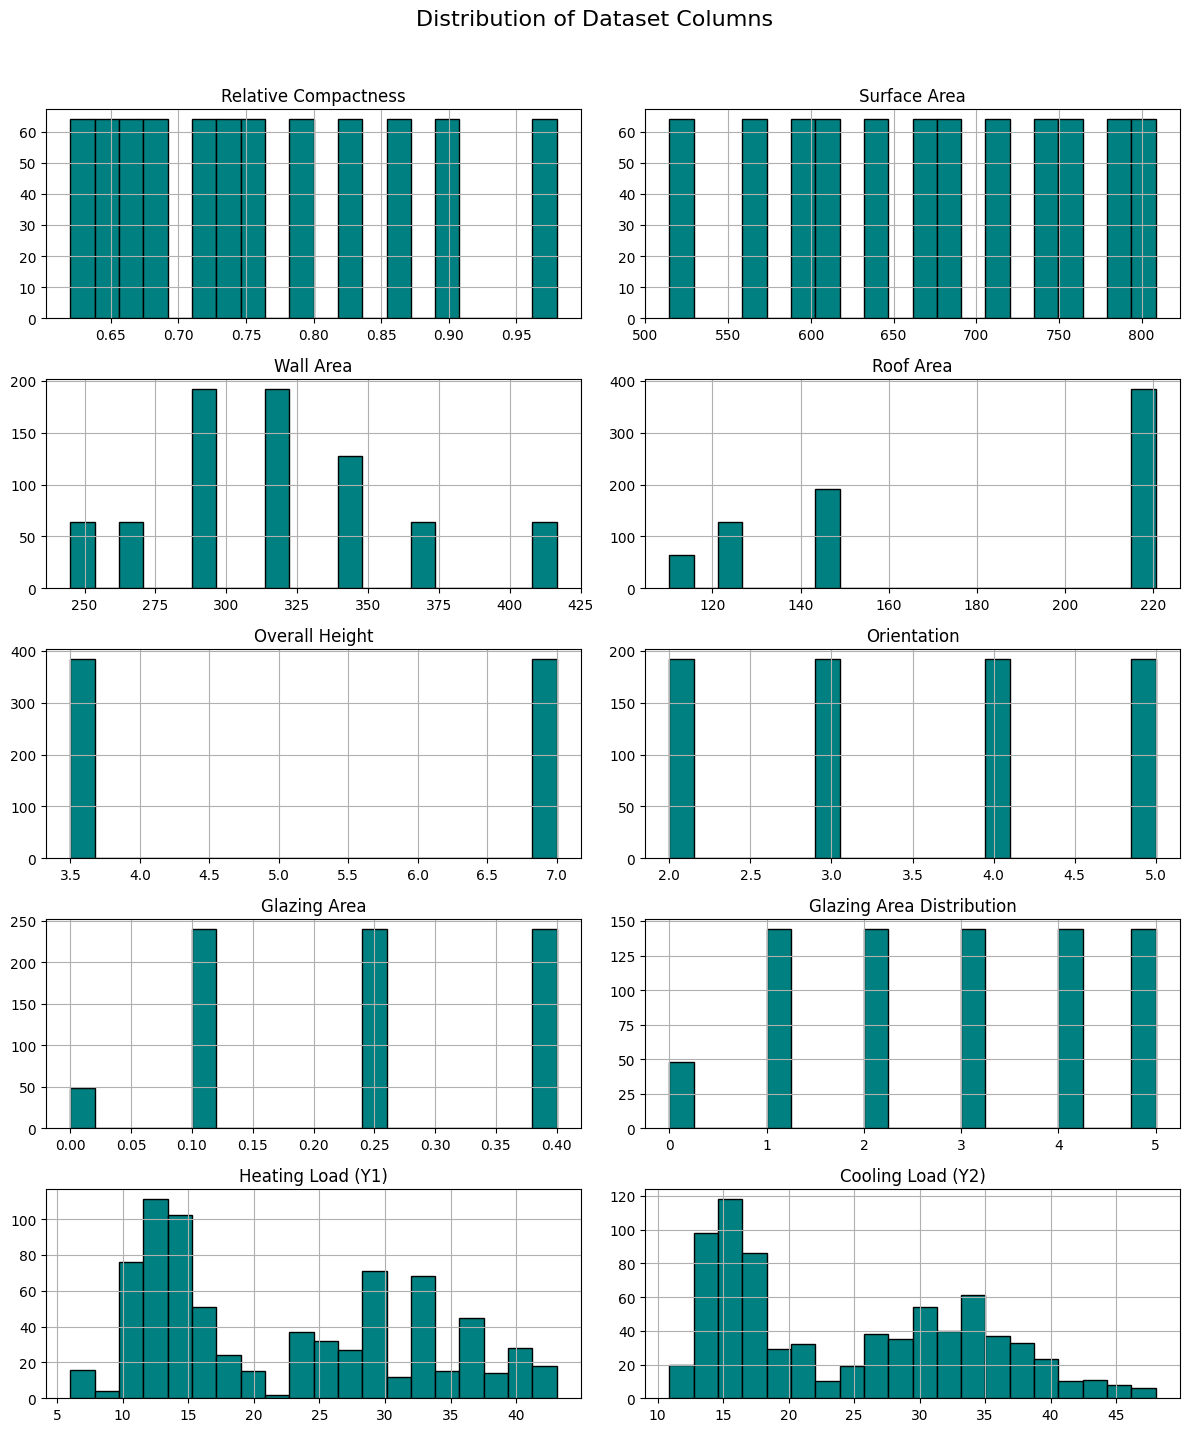

In [51]:
# Cell 4
#Distribution hist 

ordered_cols = [
    'Relative Compactness', 'Surface Area',
    'Wall Area', 'Roof Area',
    'Overall Height', 'Orientation',
    'Glazing Area', 'Glazing Area Distribution',
    'Heating Load (Y1)', 'Cooling Load (Y2)'
]

fig, axes = plt.subplots(5, 2, figsize=(12, 14))  # 5 rows, 2 columns
axes = axes.flatten()

for i, col in enumerate(ordered_cols):
    df[col].hist(bins=20, ax=axes[i], color='teal', edgecolor='black')
    axes[i].set_title(col)

fig.suptitle("Distribution of Dataset Columns", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



Box Plot fot the features:


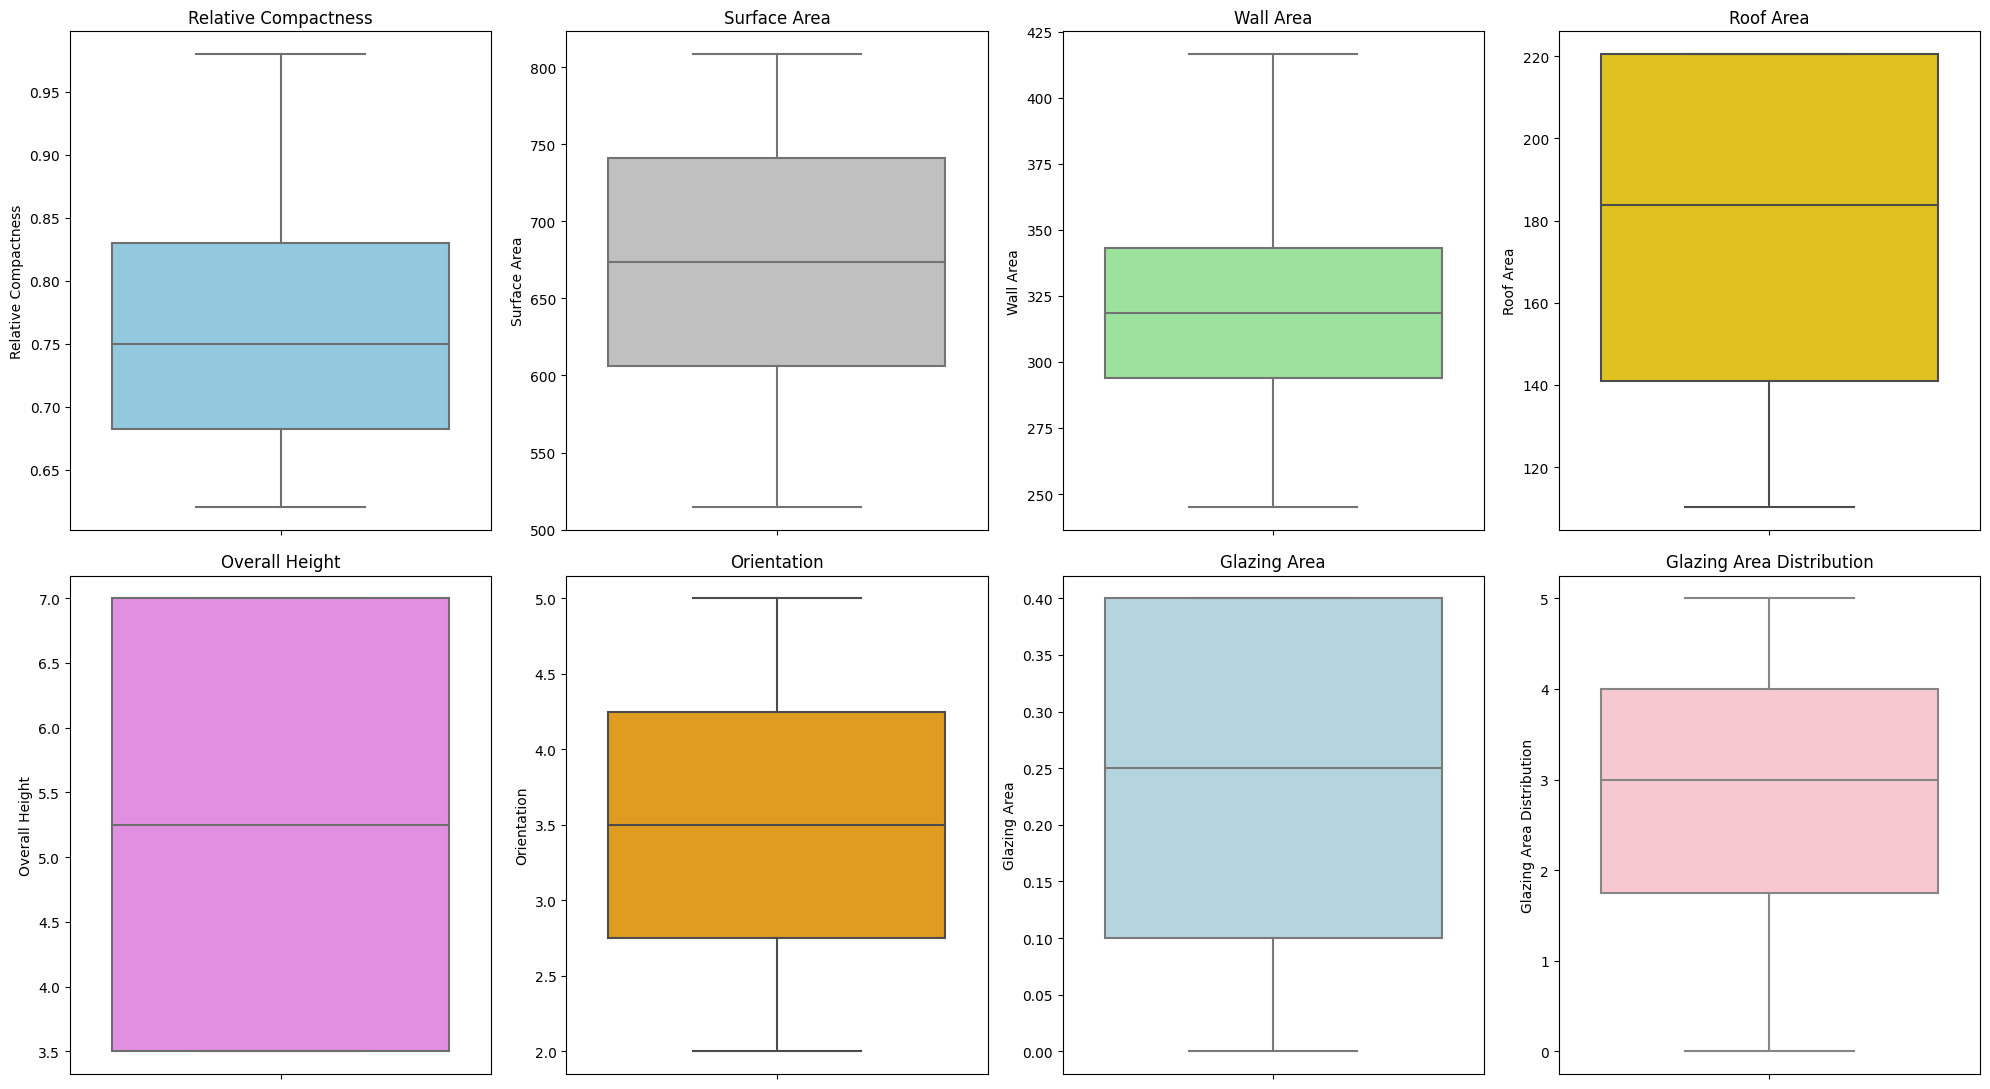

In [27]:
#Cell 5
print ("Box Plot fot the features:")
fig, axes = plt.subplots(2, 4)  
fig.set_size_inches(20, 11)

colors = ['skyblue', 'silver', 'lightgreen', 'gold', 'violet', 
          'orange', 'lightblue', 'pink']

for i, col in enumerate(numerical_cols[:-2]):
    sns.boxplot(y=df[col], ax=axes[i//4, i%4], color=colors[i])
    axes[i//4, i%4].set_title(col)



plt.tight_layout()
plt.show()

Heat Load analysis:


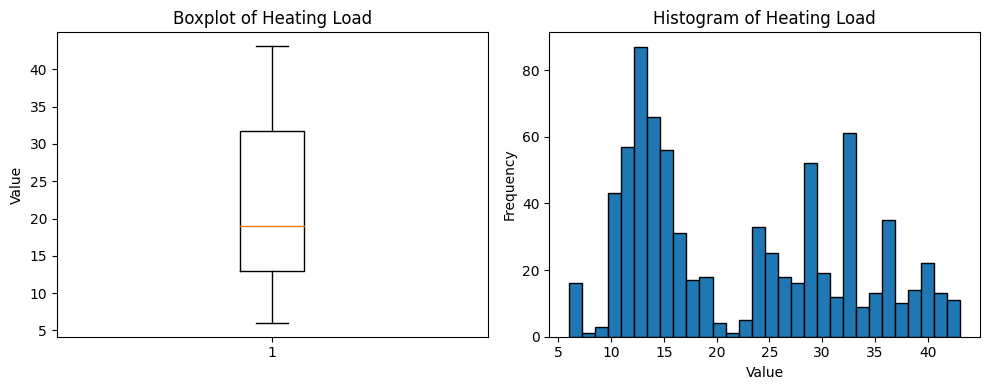

{'Lower Fence': -15.0, 'Upper Fence': 59.7, 'Num_Outliers': 0, 'Outlier_Values': array([], dtype=float64)}
{'Outlier_Detected': False, 'Outlier_Value': None, 'G_Calculated': 2.1, 'G_Critical': 4.0}
Cooling Load analysis:


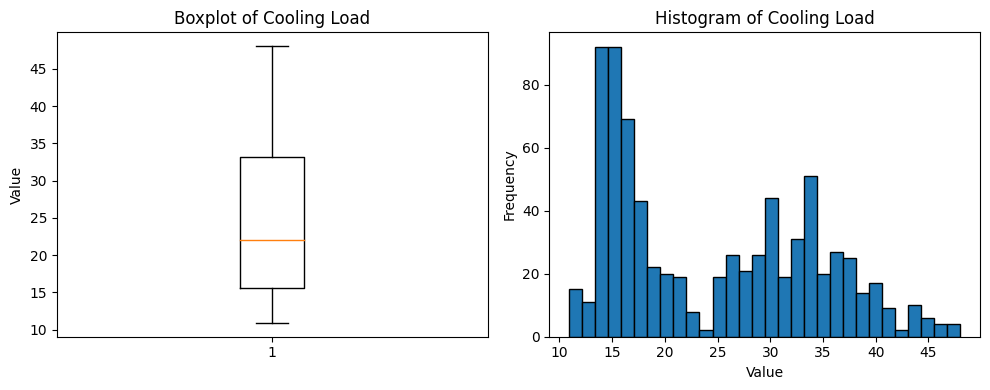

{'Lower Fence': -10.6, 'Upper Fence': 59.4, 'Num_Outliers': 0, 'Outlier_Values': array([], dtype=float64)}
{'Outlier_Detected': False, 'Outlier_Value': None, 'G_Calculated': 2.5, 'G_Critical': 4.0}


In [58]:
# Cell 6
# Target analysis

heating_load = df['Heating Load (Y1)']
cooling_load=df['Cooling Load (Y2)']

# Visual Re-confirmation 
def Visual_Reconfirmation(Target,Name="Target Name"):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.boxplot(Target) 
    plt.title(f'Boxplot of {Name}')
    plt.ylabel('Value')
    
    plt.subplot(1, 2, 2)
    plt.hist(Target, bins=30, edgecolor='black')
    plt.title(f'Histogram of {Name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

#Statistical Tests

# IQR Rule 
def IQR_Rule(Target):
    Q1 = Target.quantile(0.25)
    Q3 = Target.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the fences
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    
    # Find outliers
    outliers_iqr = Target[(Target < lower_fence) | (Target > upper_fence)]
    
    result = {
        "Lower Fence": round(lower_fence,1),
        "Upper Fence": round(upper_fence,1),
        "Num_Outliers": len(outliers_iqr),
        "Outlier_Values": outliers_iqr.values
    }
    
    return result


# Grubbs Test 
def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    abs_devs = np.abs(data - mean)
    max_dev_index = np.argmax(abs_devs)
    G_calculated = abs_devs[max_dev_index] / std

    t_critical = stats.t.ppf(1 - alpha / (2 * n), n-2)
    G_critical = ((n-1) / np.sqrt(n)) * np.sqrt(t_critical**2 / (n-2 + t_critical**2))

    if G_calculated > G_critical:
        return {
            "Outlier_Detected": True,
            "Outlier_Value": float(data[max_dev_index]),
            "G_Calculated": round(G_calculated,1),
            "G_Critical": round(G_critical,1)
        }
    else:
        return {
            "Outlier_Detected": False,
            "Outlier_Value": None,
            "G_Calculated": round(G_calculated,1),
            "G_Critical": round(G_critical,1)
        }

#-------------------------------------------------------#
# Heat Load analysis:
print("Heat Load analysis:")
Visual_Reconfirmation(heating_load,'Heating Load')
print(IQR_Rule(heating_load))
heat_result = grubbs_test(heating_load)
print(heat_result)

print("========================================================")
# Cooling Load analysis:
print("Cooling Load analysis:")
Visual_Reconfirmation(cooling_load,'Cooling Load')
print(IQR_Rule(cooling_load))
cooling_result = grubbs_test(cooling_load)
print(cooling_result)

# Correlation Matrix for Heating Load(Y1) : 

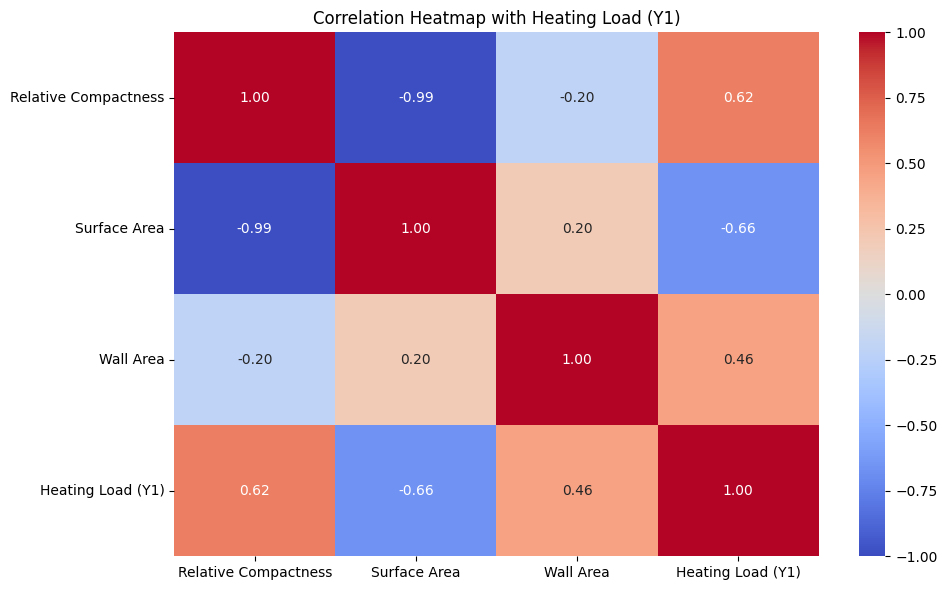

In [29]:
# Cell 7

cols_to_include = ['Relative Compactness', 'Surface Area', 'Wall Area',
                  'Heating Load (Y1)']

DataSet_With_Y1 = df[cols_to_include]

plt.figure(figsize=(10, 6))
sns.heatmap(DataSet_With_Y1.corr(), annot=True, cmap='coolwarm', fmt=".2f", 
            vmin=-1, vmax=1, center=0) 
plt.title("Correlation Heatmap with Heating Load (Y1)")
plt.tight_layout()
plt.show()


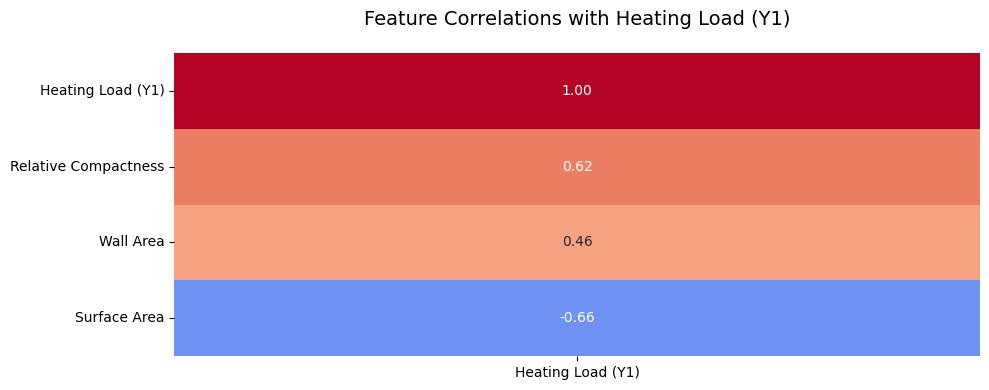

In [30]:
#Cell 8
target_corr = DataSet_With_Y1.corr()[['Heating Load (Y1)']].sort_values('Heating Load (Y1)', ascending=False)

plt.figure(figsize=(10, 4))
sns.heatmap(target_corr, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            vmin=-1, 
            vmax=1,
            cbar=False) 

plt.title('Feature Correlations with Heating Load (Y1)', fontsize=14, pad=20)
plt.xticks(rotation=0)  
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

# Correlation Matrix for Cooling Load(Y2)

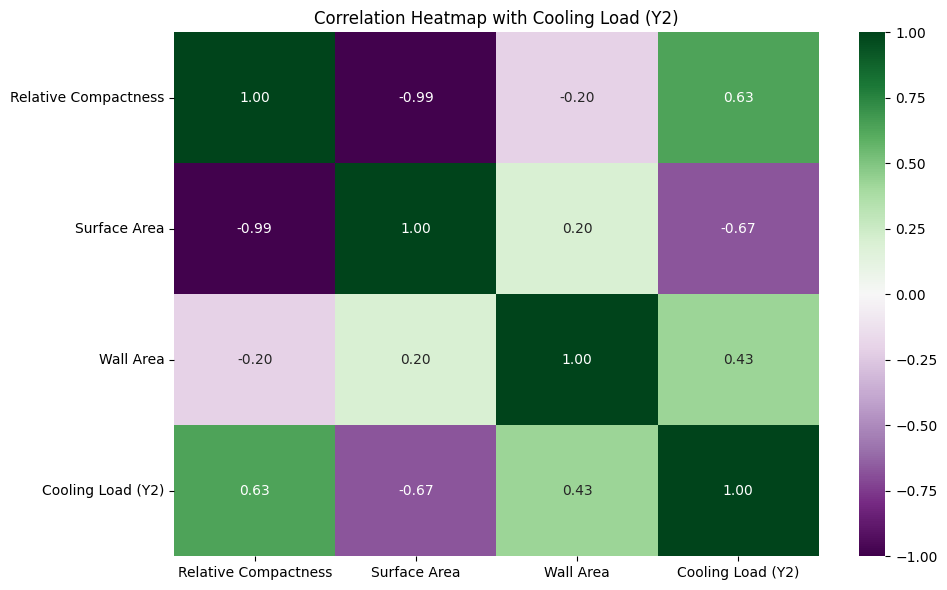

In [32]:
# Cell 9

cols_to_include = ['Relative Compactness', 'Surface Area', 'Wall Area','Cooling Load (Y2)']

DataSet_With_Y2 = df[cols_to_include]

plt.figure(figsize=(10, 6))
sns.heatmap(DataSet_With_Y2.corr(), annot=True, cmap='PRGn', fmt=".2f", 
            vmin=-1, vmax=1, center=0) 
plt.title("Correlation Heatmap with Cooling Load (Y2)")
plt.tight_layout()
plt.show()


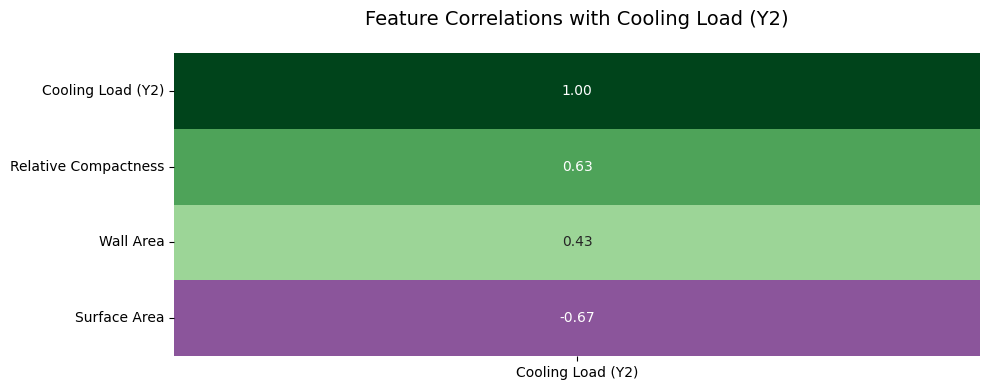

In [33]:
#Cell 10
target_corr = DataSet_With_Y2.corr()[['Cooling Load (Y2)']].sort_values('Cooling Load (Y2)', ascending=False)

plt.figure(figsize=(10, 4))
sns.heatmap(target_corr, 
            annot=True, 
            cmap='PRGn', 
            fmt=".2f",
            vmin=-1, 
            vmax=1,
            cbar=False) 

plt.title('Feature Correlations with Cooling Load (Y2)', fontsize=14, pad=20)
plt.xticks(rotation=0)  
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

# Create EDA Report:

In [62]:
#Cell 11
profile = ProfileReport(
    df,
    title="Energy Efficiency Data Quality Report",
    explorative=True,
    dataset={
        "creator": "Eng. Yazeed Alzaidi",
        "description": "Analysis of thermal data quality",
        "url": "https://www.linkedin.com/in/yazeed-alzaidi-bb4982298/"
    },
    html={
        "style": {"full_width": True, "theme": "flatly"},
        "navbar_show": True
    }
)

profile.to_file("Energy_Efficiency_Data_Quality_Report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 21.28it/s]
